# 1.0 Import Library and File

In [1]:
import pandas as pd
import numpy as np

In [2]:
multiStudData = pd.read_csv('MultiSelectedFeatures.csv')
multiStudData

,at_risk_multi_encoded,studied_credits,imd_band_encoded,highest_education_encoded,before_course_click,sum_click,after_course_click,final_score,imd_band,highest_education
0,0,60,2,2,27.0,744.0,717.0,68.7,20-30%,A Level or Equivalent
1,0,60,8,1,302.0,4104.0,3802.0,71.6,80-90%,Lower Than A Level
2,0,60,3,2,127.0,1944.0,1817.0,76.0,30-40%,A Level or Equivalent
3,0,60,6,3,31.0,1150.0,1119.0,77.1,60-70%,HE Qualification
4,0,60,3,1,88.0,1896.0,1808.0,69.9,30-40%,Lower Than A Level
...,...,...,...,...,...,...,...,...,...,...
32588,0,30,3,3,0.0,598.0,598.0,0.0,30-40%,HE Qualification
32589,0,30,4,1,0.0,389.0,389.0,0.0,40-50%,Lower Than A Level
32590,1,30,6,2,0.0,283.0,283.0,0.0,60-70%,A Level or Equivalent
32591,2,30,0,1,21.0,112.0,91.0,0.0,0-10%,Lower Than A Level


In [3]:
multiStudData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   at_risk_multi_encoded      32593 non-null  int64  
 1   studied_credits            32593 non-null  int64  
 2   imd_band_encoded           32593 non-null  int64  
 3   highest_education_encoded  32593 non-null  int64  
 4   before_course_click        32593 non-null  float64
 5   sum_click                  32593 non-null  float64
 6   after_course_click         32593 non-null  float64
 7   final_score                32593 non-null  float64
 8   imd_band                   32593 non-null  object 
 9   highest_education          32593 non-null  object 
dtypes: float64(4), int64(4), object(2)
memory usage: 2.5+ MB


In [4]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 2.0 Data Preparation

Create a copy of stud_data excluding object data types

In [5]:
stud_numeric_data = multiStudData.select_dtypes(exclude=['object']).copy()

In [6]:
stud_numeric_data

,at_risk_multi_encoded,studied_credits,imd_band_encoded,highest_education_encoded,before_course_click,sum_click,after_course_click,final_score
0,0,60,2,2,27.0,744.0,717.0,68.7
1,0,60,8,1,302.0,4104.0,3802.0,71.6
2,0,60,3,2,127.0,1944.0,1817.0,76.0
3,0,60,6,3,31.0,1150.0,1119.0,77.1
4,0,60,3,1,88.0,1896.0,1808.0,69.9
...,...,...,...,...,...,...,...,...
32588,0,30,3,3,0.0,598.0,598.0,0.0
32589,0,30,4,1,0.0,389.0,389.0,0.0
32590,1,30,6,2,0.0,283.0,283.0,0.0
32591,2,30,0,1,21.0,112.0,91.0,0.0


# 3.0 Model Building

In [7]:
X = stud_numeric_data.drop(columns=['at_risk_multi_encoded'])
y = stud_numeric_data['at_risk_multi_encoded']

## 3.1 Split the Data

In [8]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3.2 Train Model and Make Prediction

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Build the ANN model
ann_model_multi = Sequential()
ann_model_multi.add(Dense(128, input_shape=(X_train_scaled.shape[1],), activation='relu'))
ann_model_multi.add(Dropout(0.3))
ann_model_multi.add(Dense(64, activation='relu'))
ann_model_multi.add(Dropout(0.3))
ann_model_multi.add(Dense(32, activation='relu'))
ann_model_multi.add(Dropout(0.3))
ann_model_multi.add(Dense(y_train_categorical.shape[1], activation='softmax'))

# Compile the model
ann_model_multi.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = ann_model_multi.fit(X_train_scaled, y_train_categorical, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_categorical))

Epoch 1/50


d:\OneDrive - Asia Pacific University\APU\Year 3\FYP Submission\FYP_Final_Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


815/815 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6763 - loss: 0.7326 - val_accuracy: 0.7756 - val_loss: 0.5421
Epoch 2/50
815/815 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7615 - loss: 0.5740 - val_accuracy: 0.7872 - val_loss: 0.5170
Epoch 3/50
815/815 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7756 - loss: 0.5426 - val_accuracy: 0.7883 - val_loss: 0.5023
Epoch 4/50
815/815 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7860 - loss: 0.5259 - val_accuracy: 0.7987 - val_loss: 0.4890
Epoch 5/50
815/815 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7851 - loss: 0.5259 - val_accuracy: 0.7955 - val_loss: 0.4884
Epoch 6/50
815/815 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7926 - loss: 0.5073 - val_accuracy: 0.7940 - val_loss: 0.4849
Epoch 7/50
815/815 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7936 - loss: 0.5060 - val_accuracy: 0.7978 - val_loss: 0.4758
Epoch 8/50
815/815 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7921 - loss: 0.5097 - val_accuracy: 0.7990 - val_

## 3.3 Model Evaluation

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred_prob = ann_model_multi.predict(X_test_scaled)
y_pred = y_pred_prob.argmax(axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step
Accuracy: 0.7987
Confusion Matrix:
[[2999   74    6]
 [ 406  581  401]
 [  78  347 1627]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      3079
           1       0.58      0.42      0.49      1388
           2       0.80      0.79      0.80      2052

    accuracy                           0.80      6519
   macro avg       0.75      0.73      0.73      6519
weighted avg       0.78      0.80      0.79      6519



Plot ROC Curce

In [12]:
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Function to plot ROC Curve
def plot_roc_curve(model, X_test, y_test):
    # Binarize the multi-class labels
    lb = LabelBinarizer()
    y_test_bin = lb.fit_transform(y_test)

    # Compute probabilities for each class
    y_score = model.predict(X_test)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = len(lb.classes_)
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve (class {0}) (AUC = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve - Multi-Class')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    # Create a DataFrame to display ROC AUC values
    roc_auc_df = pd.DataFrame({'Class': lb.classes_, 'ROC AUC': [roc_auc[i] for i in range(n_classes)]})

    # Display the DataFrame
    print("ROC AUC values for each class:")
    print(roc_auc_df)

204/204 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step


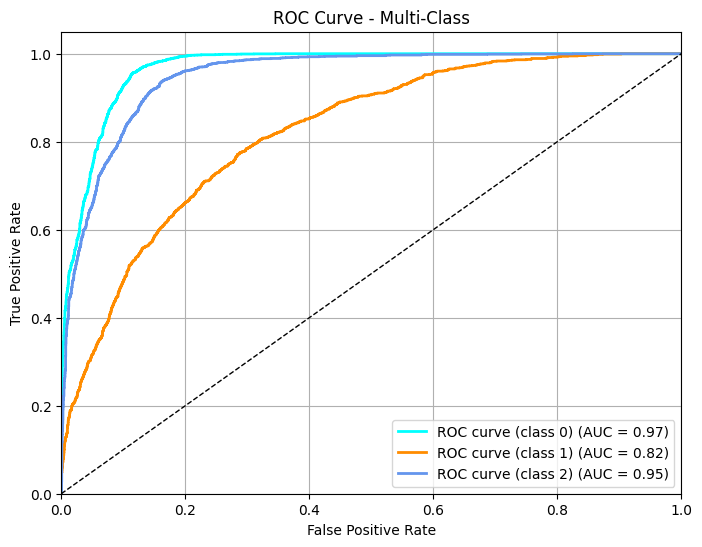

ROC AUC values for each class:
   Class   ROC AUC
0      0  0.967680
1      1  0.820310
2      2  0.948539


In [13]:
plot_roc_curve(ann_model_multi, X_test_scaled, y_test_categorical)

Function to check underfitting or overfitting

In [14]:
# Train Accuracy
train_accuracy = ann_model_multi.evaluate(X_train_scaled, y_train_categorical, verbose=0)[1]
test_accuracy = ann_model_multi.evaluate(X_test_scaled, y_test_categorical, verbose=0)[1]

print(f'Train Accuracy: {train_accuracy:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

if train_accuracy > test_accuracy:
    if (train_accuracy - test_accuracy) > 0.1:  # Threshold for significant difference
        print("\nThe model might be overfitting.")
    else:
        print("\nThe model seems to be fitting well.")
elif train_accuracy < test_accuracy:
    if(test_accuracy - train_accuracy) > 0.1:
        print("\nThe model might be underfitting.")
    else:
        print("\nThe model seems to be fitting well.")

Train Accuracy: 0.8071
Test Accuracy: 0.7987

The model seems to be fitting well.


Plot Learning Curve

In [15]:
def plot_learning_curve(history):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Plot training & validation accuracy values
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Test'], loc='upper left')
    ax[0].grid(True)

    # Plot training & validation loss values
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='upper left')
    ax[1].grid(True)

    plt.show()

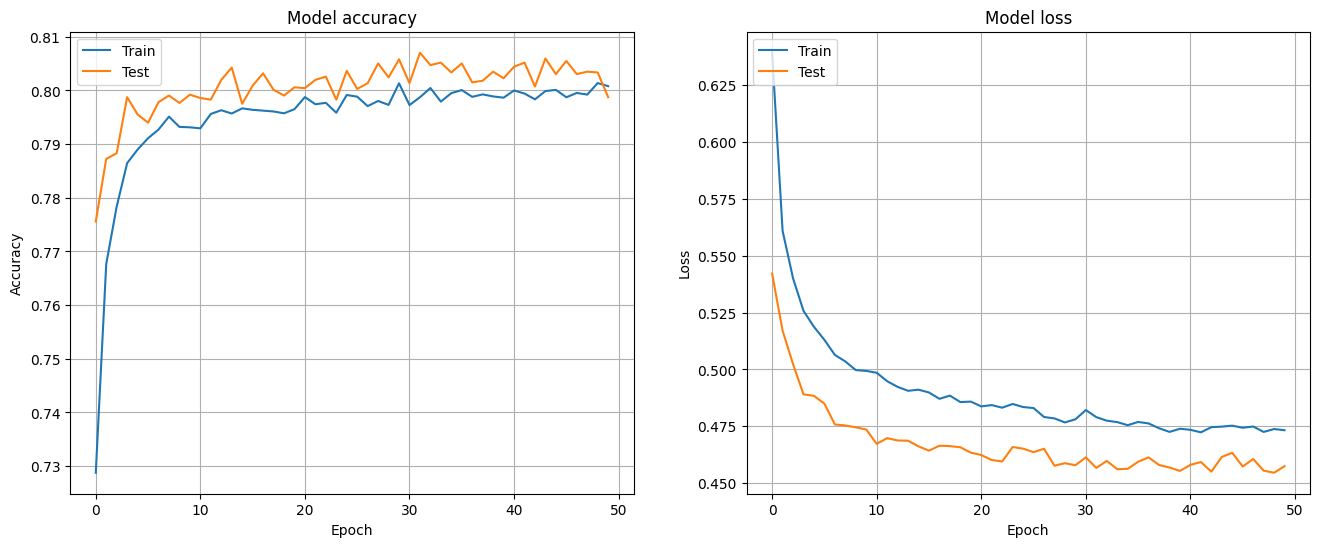

In [16]:
# Plot learning curve
plot_learning_curve(history)

# 4.0 Hyperparameter Tuning

## 4.1 Build Model

In [17]:
from scikeras.wrappers import KerasClassifier

# Build the ANN model function
def create_model(optimizer='adam', dropout_rate=0.2, neurons=1):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X_train_scaled.shape[1],), activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(y_train_categorical.shape[1], activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

## 4.2 Parameter

In [18]:
param_grid = {
    'batch_size': [10, 20, 40],
    'epochs': [50, 100],
    'optimizer': ['adam', 'rmsprop'],
    'model__dropout_rate': [0.0, 0.1, 0.2],
    'model__neurons': [20, 40, 60]
}

## 4.3 Grid Search

In [19]:
from sklearn.model_selection import GridSearchCV

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=3)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_scaled, y_train_categorical)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


d:\OneDrive - Asia Pacific University\APU\Year 3\FYP Submission\FYP_Final_Code\.venv\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
d:\OneDrive - Asia Pacific University\APU\Year 3\FYP Submission\FYP_Final_Code\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\OneDrive - Asia Pacific University\APU\Year 3\FYP Submission\FYP_Final_Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kw

GridSearchCV(cv=5,
             estimator=KerasClassifier(build_fn=<function create_model at 0x000002467B752340>, verbose=0),
             n_jobs=-1,
             param_grid={'batch_size': [10, 20, 40], 'epochs': [50, 100],
                         'model__dropout_rate': [0.0, 0.1, 0.2],
                         'model__neurons': [20, 40, 60],
                         'optimizer': ['adam', 'rmsprop']},
             verbose=3)

In [20]:
# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters found: {best_params}")
print(f"Best cross-validation accuracy: {best_score:.4f}")

Best parameters found: {'batch_size': 40, 'epochs': 100, 'model__dropout_rate': 0.2, 'model__neurons': 60, 'optimizer': 'rmsprop'}
Best cross-validation accuracy: 0.8069


In [21]:
best_ann_model_multi = grid_search.best_estimator_

best_model_history = best_ann_model_multi.fit(X_train_scaled, y_train_categorical, validation_data=(X_test_scaled, y_test_categorical), epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0).history_

# Make predictions
y_pred_prob = best_ann_model_multi.predict(X_test_scaled)
y_pred_best = y_pred_prob.argmax(axis=1)

d:\OneDrive - Asia Pacific University\APU\Year 3\FYP Submission\FYP_Final_Code\.venv\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\OneDrive - Asia Pacific University\APU\Year 3\FYP Submission\FYP_Final_Code\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 4.4 Model Evaluation

In [22]:
# Evaluate the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f'Best Model Test Accuracy: {accuracy_best:.4f}')
print('Best Model Confusion Matrix:')
print(conf_matrix_best)
print('Best Model Classification Report:')
print(class_report_best)

Best Model Test Accuracy: 0.8078
Best Model Confusion Matrix:
[[2980   81   18]
 [ 378  511  499]
 [  55  222 1775]]
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      3079
           1       0.63      0.37      0.46      1388
           2       0.77      0.87      0.82      2052

    accuracy                           0.81      6519
   macro avg       0.76      0.73      0.73      6519
weighted avg       0.79      0.81      0.79      6519



Plot ROC Curce

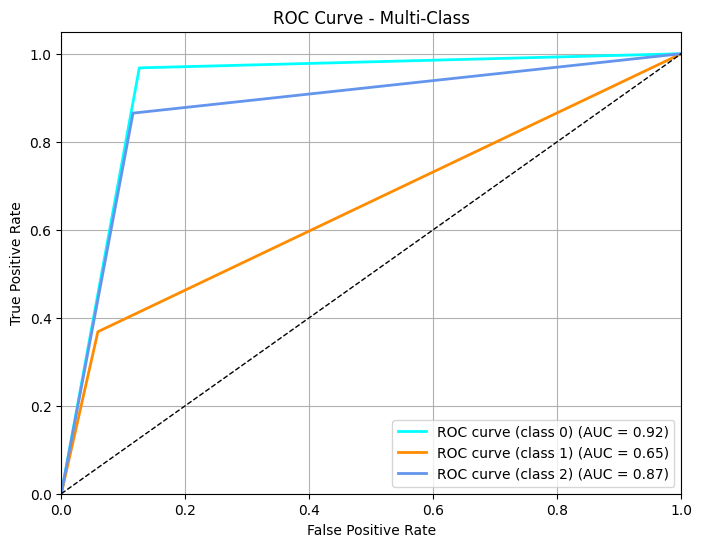

ROC AUC values for each class:
   Class   ROC AUC
0      0  0.920987
1      1  0.654551
2      2  0.874636


In [23]:
# Plot ROC Curve for the best model
plot_roc_curve(best_ann_model_multi, X_test_scaled, y_test_categorical)

Function to check underfitting or overfitting

In [24]:
# Train Accuracy
train_accuracy_best = best_ann_model_multi.score(X_train_scaled, y_train_categorical)
# Test Accuracy
test_accuracy_best = best_ann_model_multi.score(X_test_scaled, y_test_categorical)

print(f'Train Accuracy: {train_accuracy_best:.4f}')
print(f'Test Accuracy: {test_accuracy_best:.4f}')

if train_accuracy_best > test_accuracy_best:
    if (train_accuracy_best - test_accuracy_best) > 0.1:  # Threshold for significant difference
        print("\nThe model might be overfitting.")
    else:
        print("\nThe model seems to be fitting well.")
elif train_accuracy_best < test_accuracy_best:
    if(test_accuracy_best - train_accuracy_best) > 0.1:
        print("\nThe model might be underfitting.")
    else:
        print("\nThe model seems to be fitting well.")

Train Accuracy: 0.8141
Test Accuracy: 0.8078

The model seems to be fitting well.


Plot Learning Curve

In [25]:
def plot_learning_curve_best(history):
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    epochs = range(1, len(history['accuracy']) + 1)
    x_ticks = [25, 50, 75, 100]

    # Plot training & validation accuracy values
    ax[0].plot(epochs, history['accuracy'])
    ax[0].plot(epochs, history['val_accuracy'])
    ax[0].set_title('Model accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Test'], loc='upper left')
    ax[0].grid(True)
    ax[0].set_xticks(x_ticks)


    # Plot training & validation loss values
    ax[1].plot(epochs, history['loss'])
    ax[1].plot(epochs, history['val_loss'])
    ax[1].set_title('Model loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Test'], loc='upper left')
    ax[1].grid(True)
    ax[1].set_xticks(x_ticks)


    plt.show()

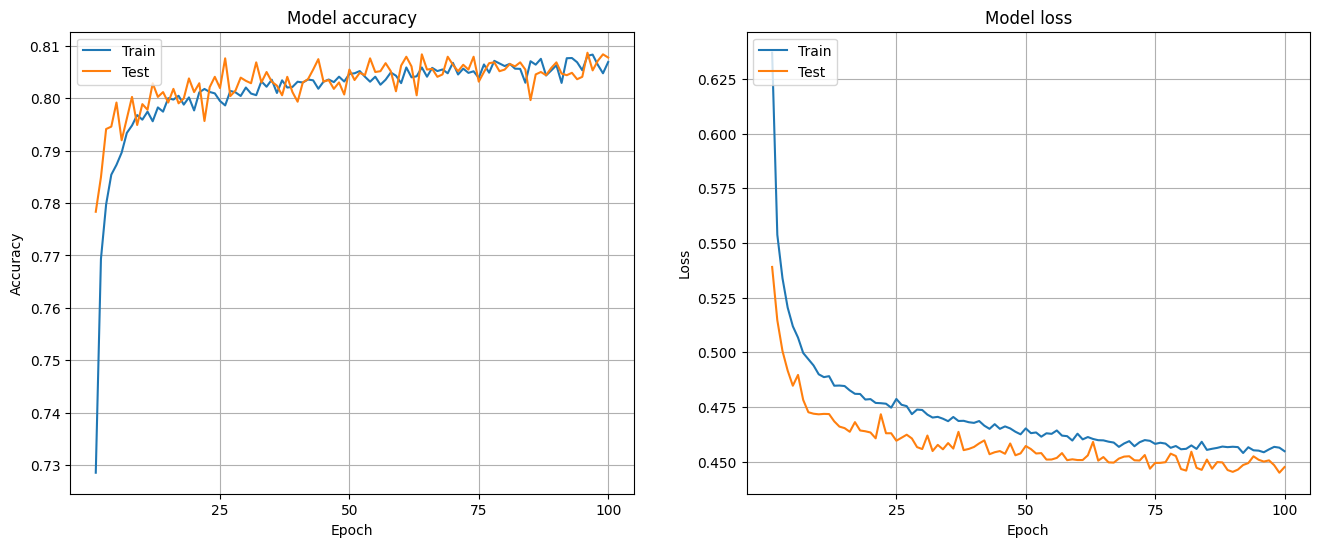

In [26]:
# Plot learning curve for the best model
plot_learning_curve_best(best_model_history)

# 5.0 Permutation Importance of Model Building

In [32]:
def permutation_importance_keras(model, X, y, n_repeats=10, random_state=42):
    y_pred = model.predict(X).argmax(axis=1)
    baseline_score = accuracy_score(y, y_pred)
    scores = np.zeros((X.shape[1], n_repeats))
    
    for i in range(X.shape[1]):
        X_permuted = X.copy()
        for n in range(n_repeats):
            np.random.seed(random_state + n)
            X_permuted[:, i] = np.random.permutation(X_permuted[:, i])
            y_permuted_pred = model.predict(X_permuted).argmax(axis=1)
            scores[i, n] = accuracy_score(y, y_permuted_pred)
    
    importances = baseline_score - scores.mean(axis=1)

    return importances

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
204/204 ━━━━━━━━

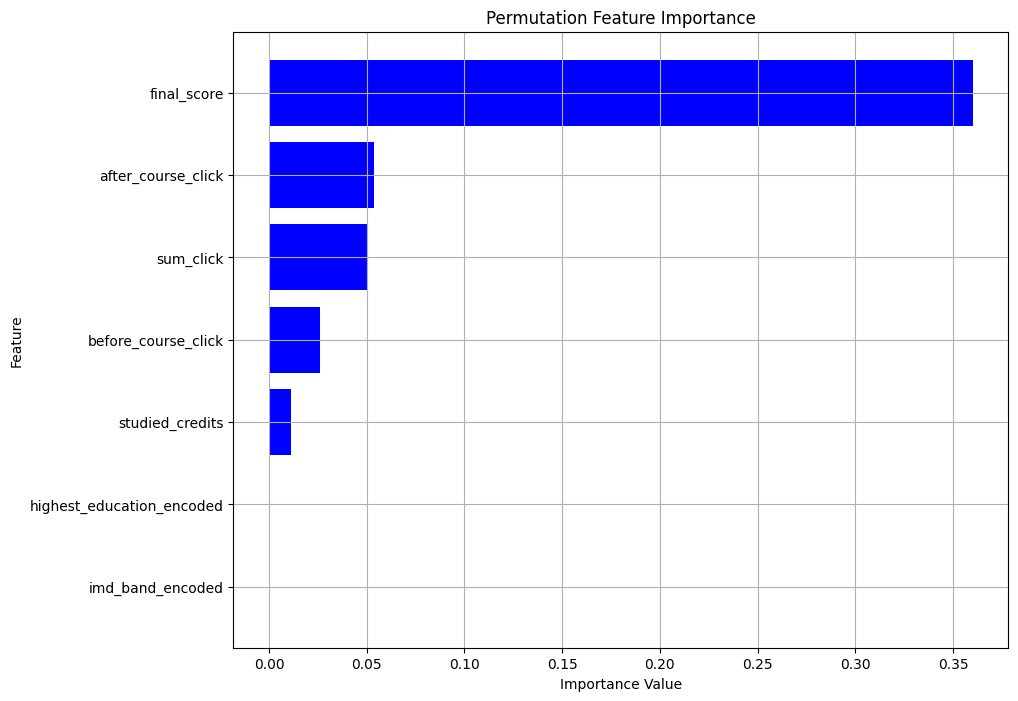

Feature Importance:


,Feature,Importance
6,final_score,0.360285
5,after_course_click,0.053904
4,sum_click,0.050161
3,before_course_click,0.026246
0,studied_credits,0.011474
2,highest_education_encoded,-0.000169
1,imd_band_encoded,-0.000245


In [33]:
# Compute permutation importance
importances = permutation_importance_keras(ann_model_multi, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='b')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

# Display the DataFrame
print("Feature Importance:")
importance_df[['Feature', 'Importance']]

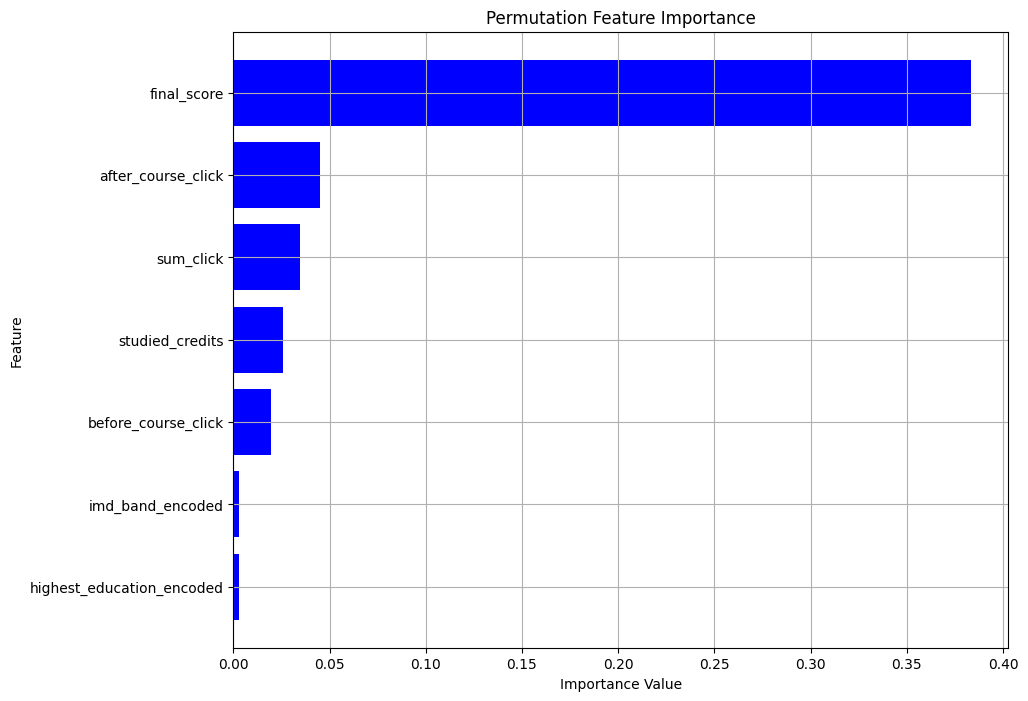

Feature Importance:


,Feature,Importance
6,final_score,0.383510
5,after_course_click,0.045038
4,sum_click,0.034852
0,studied_credits,0.025755
3,before_course_click,0.019374
1,imd_band_encoded,0.003206
2,highest_education_encoded,0.003114


In [34]:
# Compute permutation importance
importances = permutation_importance_keras(best_ann_model_multi, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Create a DataFrame for the feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='b')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

# Display the DataFrame
print("Feature Importance:")
importance_df[['Feature', 'Importance']]

# Save Model

In [35]:
import joblib
# Save the model
joblib.dump(ann_model_multi, 'Model/Base/ann_model_multi.pkl')

['Model/Base/ann_model_multi.pkl']

In [37]:
import joblib
# Save the model
joblib.dump(best_ann_model_multi, 'Model/Tuned/best_ann_model_multi.keras')

['Model/Tuned/best_ann_model_multi.keras']